# Circuit library

They are all rendering as block.

In [1]:
import numpy as np
import matplotlib
%matplotlib inline

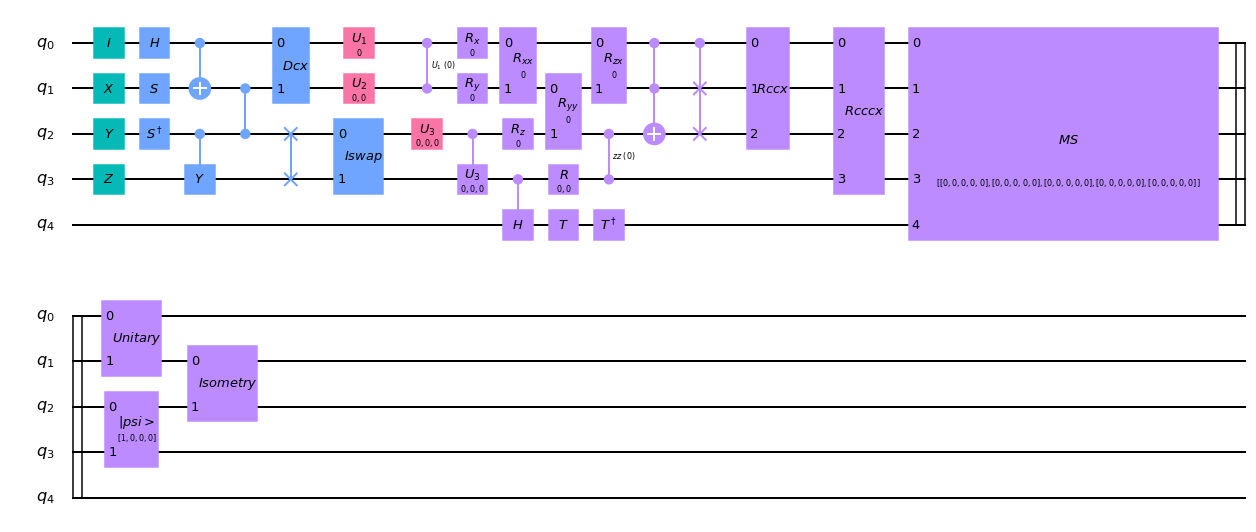

In [2]:
from qiskit.circuit import QuantumCircuit

circuit = QuantumCircuit(5)
circuit.i(0)
circuit.x(1)
circuit.y(2)
circuit.z(3)

circuit.h(0)
circuit.s(1)
circuit.sdg(2)
circuit.cx(0, 1)
circuit.cy(2, 3)
circuit.cz(1, 2)
circuit.swap(2, 3)
circuit.iswap(2, 3)
circuit.dcx(0, 1)

circuit.u1(0, 0)
circuit.u2(0, 0, 1)
circuit.u3(0, 0, 0, 2)


circuit.cu1(0, 0, 1)
circuit.cu3(0, 0, 0, 2, 3)

circuit.ch(3, 4)

circuit.rx(0, 0)
circuit.ry(0, 1)
circuit.rz(0, 2)
circuit.r(0, 0, 3)
circuit.t(4)
circuit.tdg(4)

circuit.rxx(0, 0, 1)
circuit.ryy(0, 1, 2)
circuit.rzz(0, 2, 3)
circuit.rzx(0, 0, 1)
circuit.ccx(0, 1, 2)
circuit.cswap(0, 1, 2)
circuit.rccx(0, 1, 2)
circuit.rcccx(0, 1, 2, 3)
circuit.ms([[0] * 5] * 5, [0, 1, 2, 3, 4])

circuit.unitary(np.eye(4), [0, 1])
circuit.initialize(np.eye(4)[0,:], [2, 3])
circuit.isometry(np.eye(4), [], [1, 2])

circuit.draw(output='mpl')

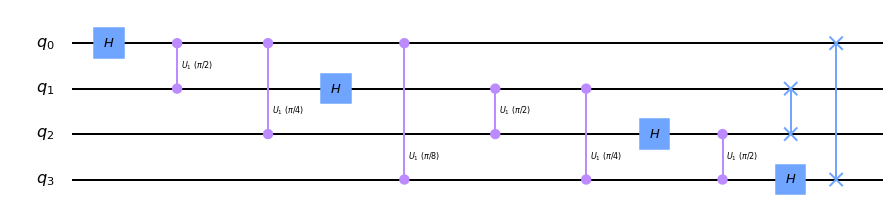

In [3]:
from qiskit.circuit.library import QFT  # e.g. for the Quantum Fourier Transform
QFT(4).draw(output='mpl')

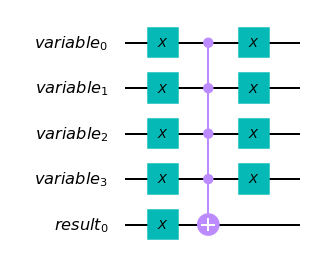

In [4]:
from qiskit.circuit.library import OR
OR(4).draw(output='mpl')

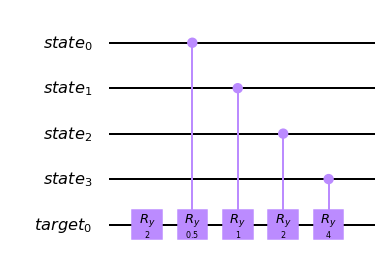

In [5]:
from qiskit.circuit.library import LinearPauliRotations
LinearPauliRotations(4, offset=2, slope=0.5).draw(output='mpl')

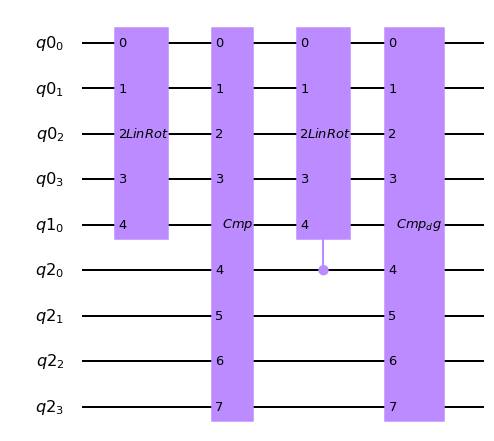

In [6]:
from qiskit.circuit.library import PiecewiseLinearPauliRotations
PiecewiseLinearPauliRotations(4, breakpoints=[0, 2], offsets=[2, 1], slopes=[0.5, -0.5]).draw(output='mpl')

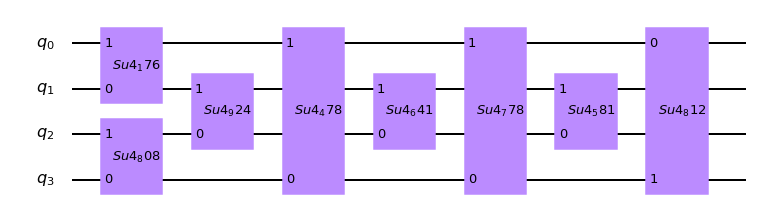

In [7]:
from qiskit.circuit.library import QuantumVolume
QuantumVolume(4).decompose().draw(output='mpl')

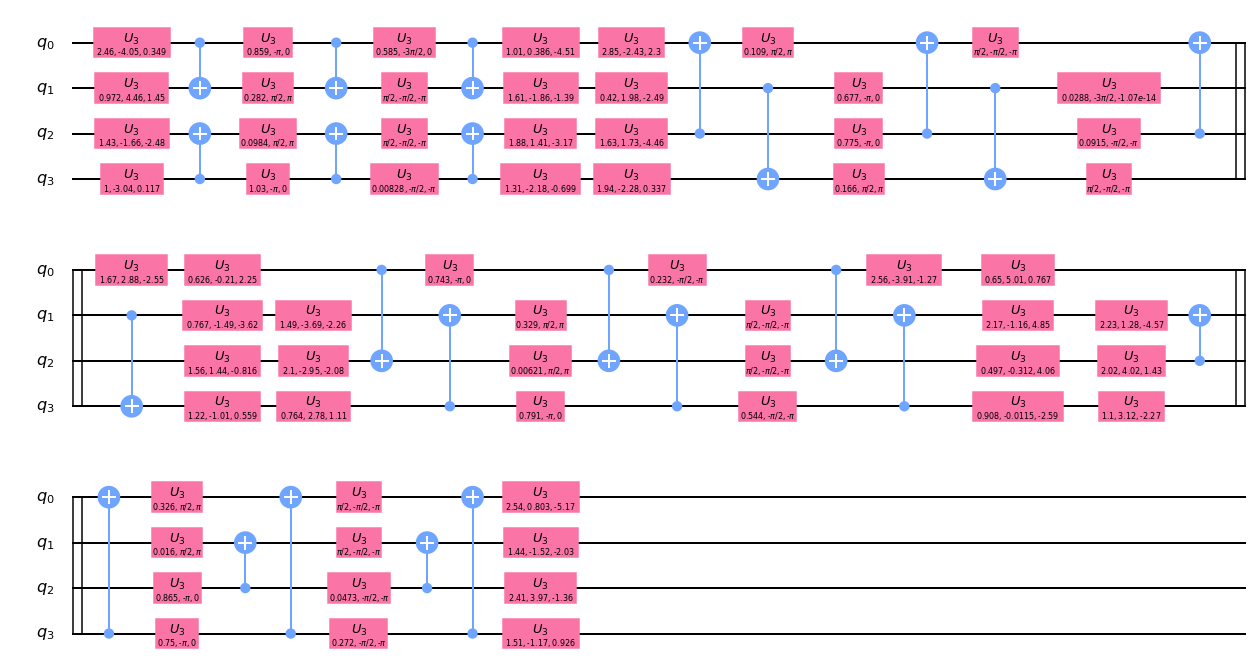

In [8]:
QuantumVolume(4).decompose().decompose().draw(output='mpl')

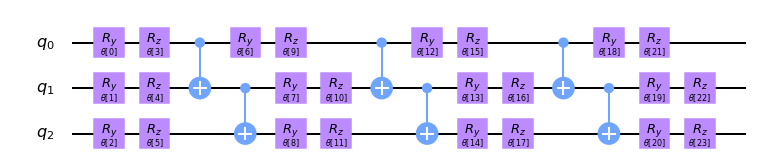

In [9]:
from qiskit.circuit.library import EfficientSU2
EfficientSU2(3, entanglement='linear').draw(output='mpl')

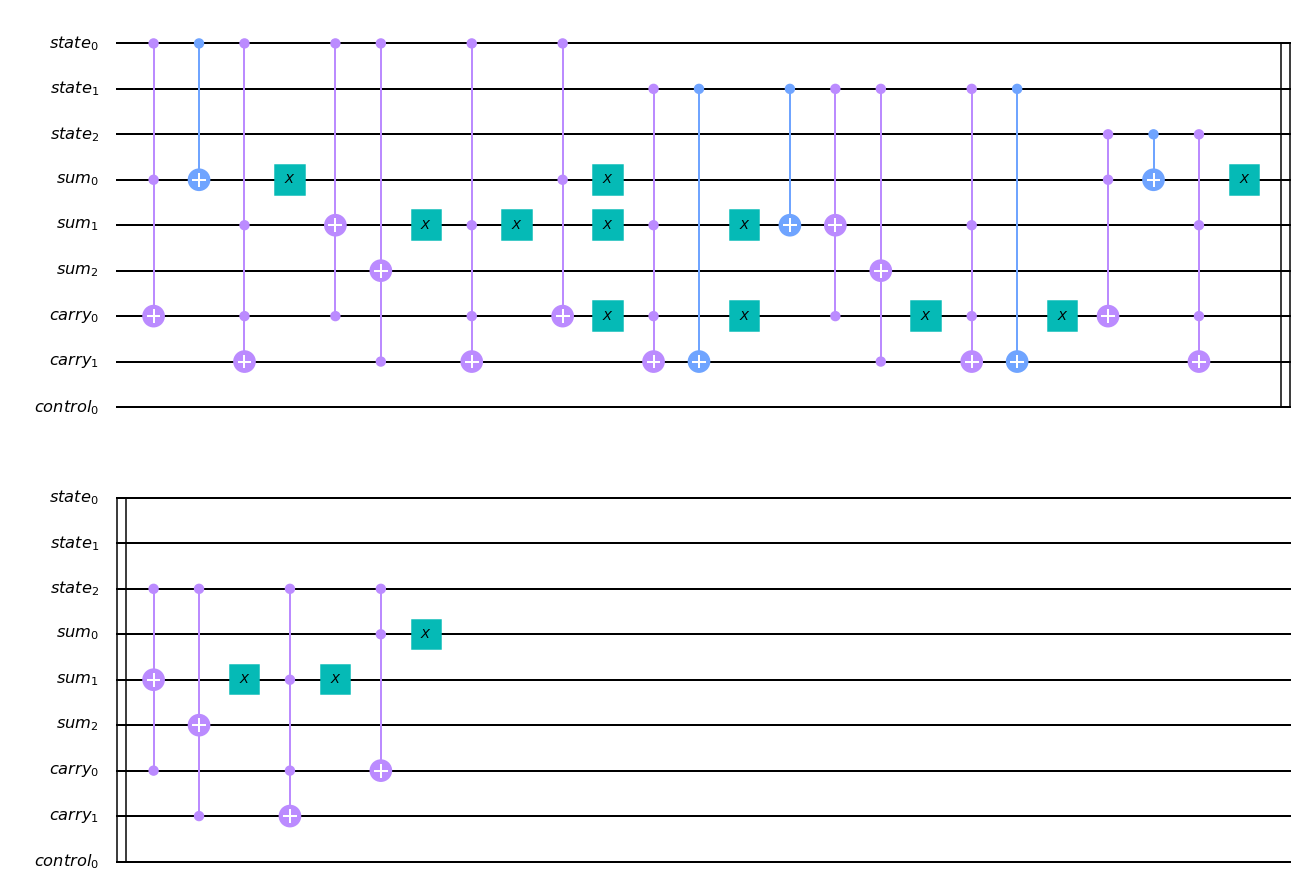

In [10]:
from qiskit.circuit.library import WeightedAdder
WeightedAdder(3, [1,2,1]).draw(output='mpl')

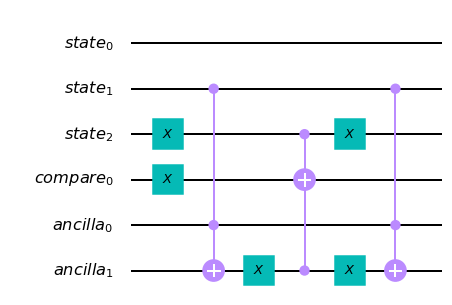

In [11]:
from qiskit.circuit.library import IntegerComparator
IntegerComparator(3, 4).draw(output='mpl')

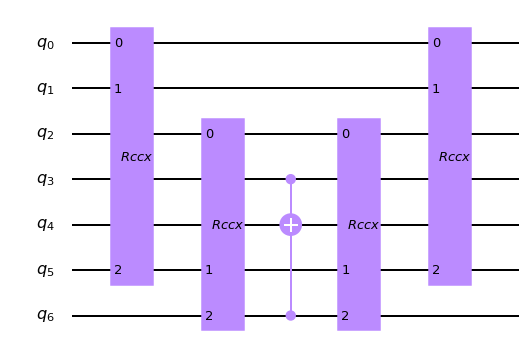

In [12]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(7)
circuit.mcx([0, 1, 2, 3], 4, ancilla_qubits=[5, 6], mode='v-chain')
circuit.decompose().draw(output='mpl')

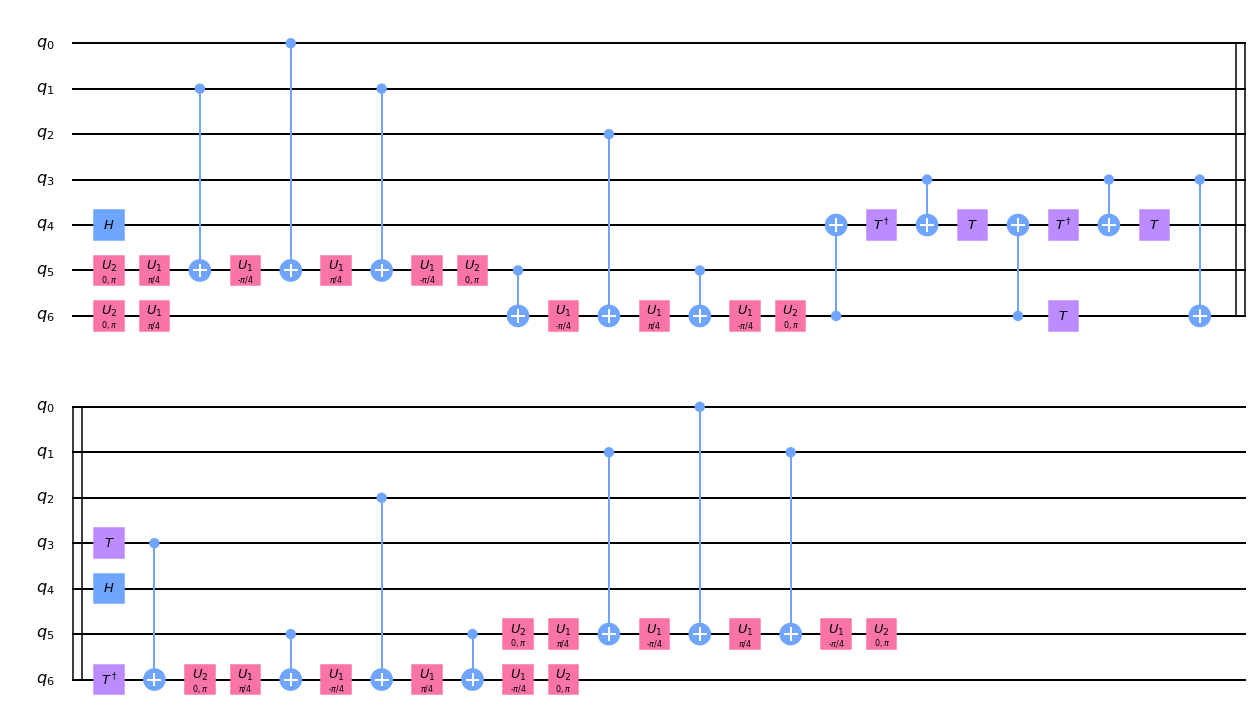

In [13]:
circuit.decompose().decompose().draw(output='mpl')

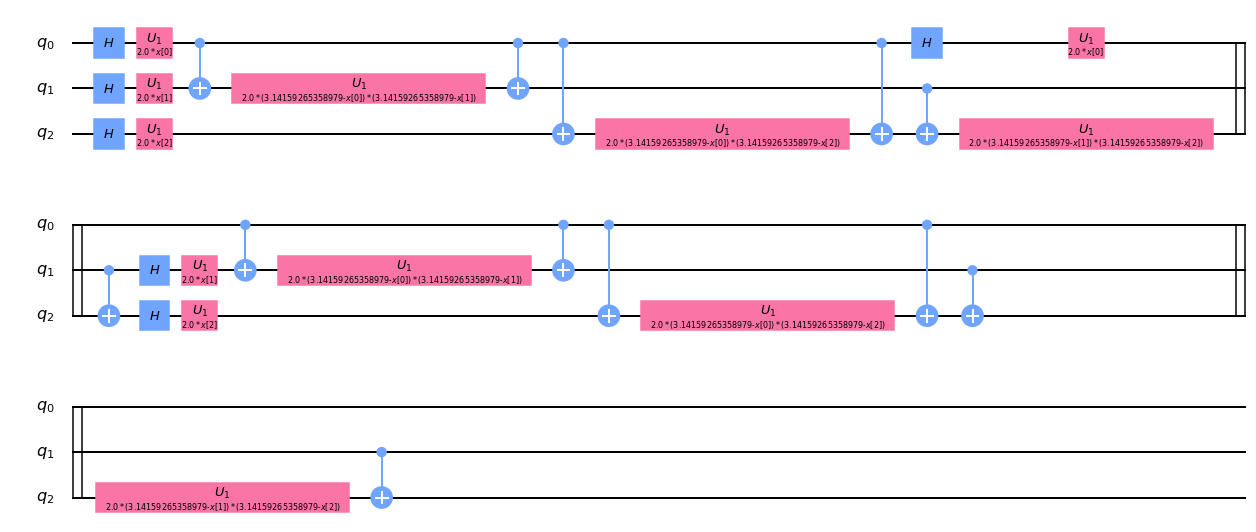

In [14]:
from qiskit.circuit.library import ZZFeatureMap
ZZFeatureMap(3).draw(output='mpl')

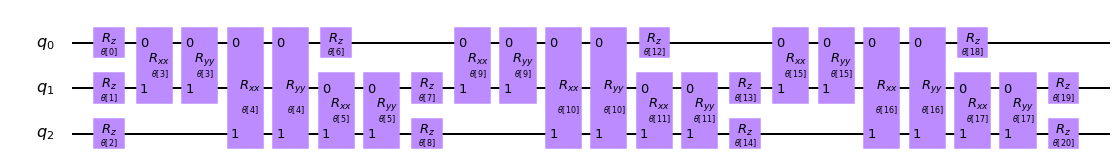

In [15]:
from qiskit.circuit.library import ExcitationPreserving
ExcitationPreserving(3).draw(output='mpl')

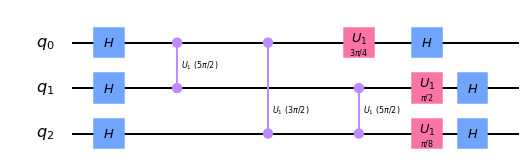

In [16]:
from qiskit.circuit.library import IQP
IQP([[6, 5, 3], [5, 4, 5], [3, 5, 1]]).decompose().draw(output='mpl')

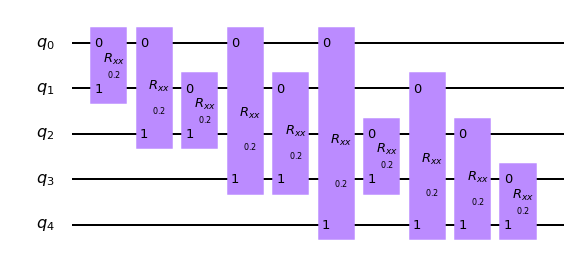

In [17]:
from qiskit.circuit.library import GMS
GMS(5, [[0.2] * 5] * 5).decompose().draw(output='mpl')

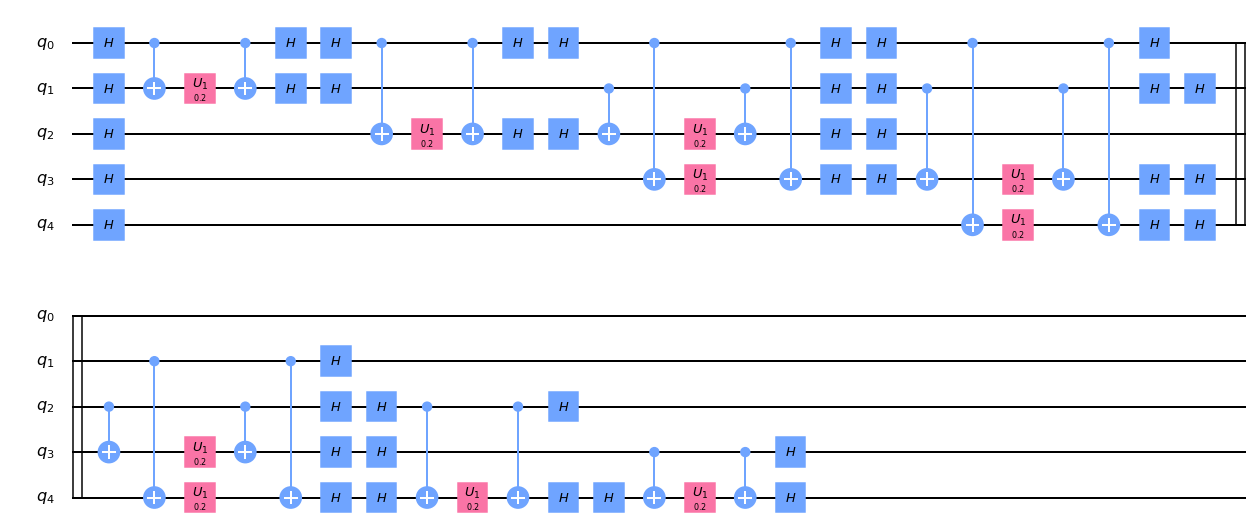

In [18]:
GMS(5, [[0.2] * 5] * 5).decompose().decompose().draw(output='mpl')

In [19]:
from qiskit.circuit import QuantumCircuit
from qiskit.aqua.operators import *

In [30]:
op = (0.2 * (X ^ Y ^ Z) + 3 * (I ^ Z ^ I))
op.primitive_strings()

{'Pauli'}

In [ ]:
exp = PauliExpectation().convert(~StateFn(op) @ state)
sampler = CircuitSampler(backend).convert(exp)
result = sampler.eval()

In [ ]:
exp = PauliExpectation().convert(~StateFn(op) @ state)
result = exp.eval(backend)

In [31]:
z = MatrixOp([[1, 0], [0, -1]])

In [35]:
op = (z + Z + z)

In [36]:
op.reduce()

SummedOp([MatrixOp(Operator([[ 1.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j]],
         input_dims=(2,), output_dims=(2,)), coeff=2.0), PauliOp(Pauli(z=[True], x=[False]), coeff=1.0)], coeff=1.0, abelian=False)

In [42]:
((z + Z) @ (Z + z)) == ((z + Z) @ (z + Z))

True

In [1]:
from qiskit import Aer
from qiskit.aqua.operators import *

ops = [X, X ^ X, X ^ 5]
state = Zero

list_op = ListOp(ops)
expectation = PauliExpectation().convert(~StateFn(list_op) @ state)
sampler = CircuitSampler(Aer.get_backend('statevector_simulator')).convert(expectation)
sampler.eval()

Process ForkProcess-2:
Process ForkProcess-1:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(bloc

TypeError: can't pickle PyCapsule objects

In [2]:
ListOp([X, X^X]).to_matrix_op()

ListOp([MatrixOp(Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,)), coeff=1.0), MatrixOp(Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2)), coeff=1.0)], coeff=1.0, abelian=False)

In [45]:
from qiskit.circuit import Parameter, QuantumCircuit, Instruction
from qiskit.circuit.library import MCMT

In [26]:
th = Parameter('θ')

In [69]:
qc = QuantumCircuit(5)
# qc.mcmt('h', [0, 1], [2, 3])
qc.append(MCMT('h', 3, 2, label='gate'), [0, 1, 4, 2, 3])

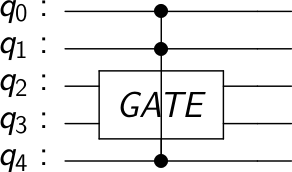

In [70]:
qc.decompose().draw(output='latex')

In [86]:
from qiskit import QuantumRegister, transpile
from qiskit.circuit.library import RXGate, RYGate

In [94]:
num_ctrl = 5
q_ctrl = QuantumRegister(num_ctrl)
q_target = QuantumRegister(1)
function = QuantumCircuit(q_ctrl, q_target)
function.mcrx(0.2, q_ctrl[:], q_target[0], None)

gate = QuantumCircuit(q_ctrl, q_target)
gate.append(RXGate(0.2).control(num_ctrl), q_ctrl[:] + q_target[:])
basis = ['u1', 'u3', 'cx']
print('mcrx:', transpile(function, basis_gates=basis).count_ops())
print('RXGate:', transpile(gate, basis_gates=basis).count_ops())

mcrx: OrderedDict([('cx', 92), ('u3', 62), ('u1', 1)])
RXGate: OrderedDict([('cx', 92), ('u3', 62), ('u1', 1)])
